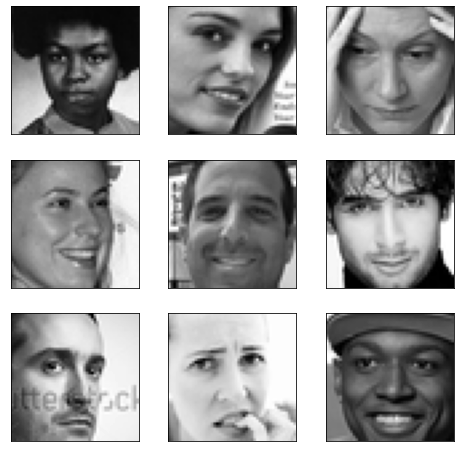

Training data shape:  (29000, 3)
Testing data shape:  (6887, 2)


In [1]:
#We will start by importing the vital libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

#We then proceed towards reproducibility and set seed
tf.random.set_seed(42)
np.random.seed(42)

#The datasets 
train_data = pd.read_csv('my_emotion_train.csv')
test_data = pd.read_csv('my_emotion_test.csv')

#To gain clarity, we carry out some visualisation for initial images
pixels = train_data['pixels'].str.split().values.tolist()
pixels = np.array(pixels, dtype='float32').reshape(-1, 48, 48)

fig = plt.figure(figsize=(8, 8))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(pixels[i], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

random.seed(42)
print("Training data shape: ", train_data.shape)
print("Testing data shape: ", test_data.shape)


In [2]:
#Looking at the set shape
np.random.seed(42)
random.seed(42)

train_df = pd.read_csv('my_emotion_train.csv')

X = train_df['pixels'].values
y = train_df['emotion'].values

X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in X])

X = X/255.0

X = X.reshape(-1, 48, 48, 1)

num_classes = len(np.unique(y))
y = np.eye(num_classes)[y]

split = 0.8
split_val = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - split), random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=split_val/split, random_state=42, shuffle=True)

print('Training set shape:', X_train.shape)
print('Validation set shape:', X_val.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (20300, 48, 48, 1)
Validation set shape: (2900, 48, 48, 1)
Testing set shape: (5800, 48, 48, 1)


In [3]:
#Data cleaning was not carried out earlier, since the 'emotion' column is not present in the 'test' dataset
#Now, we change it to string data

np.random.seed(42)
train_df = pd.read_csv('my_emotion_train.csv')
test_df = pd.read_csv('my_emotion_test.csv')


train_df["emotion"] = train_df["emotion"].astype(str)

#Now, we carry out preprocessing by splitting the pixel into numpy arrays and reshaping the pixel arrays to images
def preprocess_data(df):
  
    pixels = df["pixels"].str.split().apply(lambda x: np.array(x, dtype="float32"))
    
    
    images = np.stack(pixels.values, axis=0).reshape(-1, 48, 48, 1)
    images /= 255.0
    
    # Now we use one-hot encoding for converting 'emotion' labels to vectors
    if "emotion" in df.columns:
        emotions = pd.get_dummies(df["emotion"]).values
    else:
        emotions = None
    
    return images, emotions

# Further processing and splitting the testing, training and validation data
train_images, train_emotions = preprocess_data(train_df)
test_images, test_emotions = preprocess_data(test_df)

train_size = 0.8
val_size = 0.1
test_size = 0.1

# Here the training is split further into validation and training
train_images, val_images, train_emotions, val_emotions = train_test_split(train_images, train_emotions, 
                                                                          train_size=train_size, 
                                                                          random_state=42)

train_datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    train_images,
    train_emotions,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    val_images,
    val_emotions,
    batch_size=32,
    shuffle=False
)

test_generator = test_datagen.flow(
    test_images,
    batch_size=32,
    shuffle=False
)


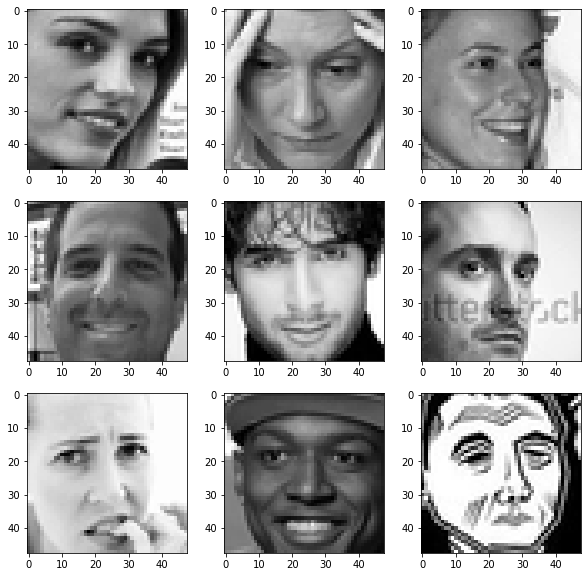

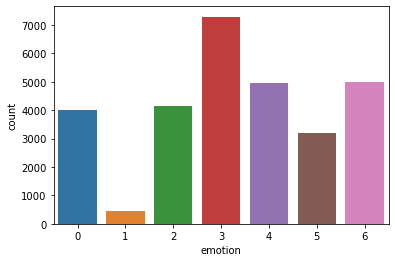

Logistic Regression - Accuracy: 0.06 - F1 Score: 0.11


C:\Users\Syed Fahad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, LSTM, SimpleRNN, GRU, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model

train_data = pd.read_csv('my_emotion_train.csv')
test_data = pd.read_csv('my_emotion_test.csv')

# Now we look at the images and look for class imbalance
fig = plt.figure(figsize=(10, 10))
for i in range(1, 10):
    img = np.array(train_data.loc[i, "pixels"].split()).reshape(48, 48).astype("int")
    fig.add_subplot(3, 3, i)
    plt.imshow(img, cmap="gray")
plt.show()

sns.countplot(x="emotion", data=train_data)
plt.show()

X = np.array([np.array(x.split(" ")).astype("float").reshape(48, 48, 1) for x in train_data["pixels"]])
y = to_categorical(train_data["emotion"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X_test = np.array([np.array(x.split(" ")).astype("float").reshape(48, 48, 1) for x in test_data["pixels"]])
test_data['emotion'] = 0
y_test = to_categorical(test_data["emotion"])

X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test = X_test.astype("float32") / 255

#Here we carry out data augmentation and logistic regression
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, horizontal_flip=True)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
lr_pred = lr_model.predict(X_test.reshape(X_test.shape[0], -1))
lr_acc = accuracy_score(np.argmax(y_test, axis=1), lr_pred)
lr_f1 = f1_score(np.argmax(y_test, axis=1), lr_pred, average="weighted")
print("Logistic Regression - Accuracy: {:.2f} - F1 Score: {:.2f}".format(lr_acc, lr_f1))                                                              



In [5]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('my_emotion_train.csv')
test_df = pd.read_csv('my_emotion_test.csv')

X_train = np.array(train_df.pixels.str.split(' ').tolist(), dtype='float32').reshape(-1, 48, 48, 1) / 255.0
y_train = train_df.emotion.values

X_test = np.array(test_df.pixels.str.split(' ').tolist(), dtype='float32').reshape(-1, 48, 48, 1) / 255.0
y_test = np.zeros(len(test_df), dtype=int)

# Here we carry out splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Now we convert labels to one-hot encoded arrays
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

# Fitting the label encoder on y_train and transform y_train and y_val
le = LabelEncoder()
y_train_le = le.fit_transform(y_train.argmax(axis=1))
y_val_le = le.transform(y_val.argmax(axis=1))

# Here we define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# We move further towards compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
#Now we consucting training and prediction the model, subsequently converting it to class labels
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])

y_pred = model.predict(X_val)

y_pred_classes = le.inverse_transform(y_pred.argmax(axis=1))

# Here y_val is converted to class labels
y_val_classes = le.inverse_transform(y_val.argmax(axis=1))

print("Convolutional Neural Network")
print(f"Accuracy: {accuracy_score(y_val_classes, y_pred_classes):.4f}")


Epoch 1/50
408/408 [==============================] - 143s 347ms/step - loss: 1.6636 - accuracy: 0.3423 - val_loss: 1.4822 - val_accuracy: 0.4245
Epoch 2/50
408/408 [==============================] - 166s 406ms/step - loss: 1.4627 - accuracy: 0.4397 - val_loss: 1.4217 - val_accuracy: 0.4434
Epoch 3/50
408/408 [==============================] - 182s 446ms/step - loss: 1.3570 - accuracy: 0.4811 - val_loss: 1.3521 - val_accuracy: 0.4690
Epoch 4/50
408/408 [==============================] - 163s 400ms/step - loss: 1.2773 - accuracy: 0.5131 - val_loss: 1.3263 - val_accuracy: 0.4969
Epoch 5/50
408/408 [==============================] - 147s 360ms/step - loss: 1.2043 - accuracy: 0.5412 - val_loss: 1.3170 - val_accuracy: 0.4959
Epoch 6/50
408/408 [==============================] - 134s 328ms/step - loss: 1.1249 - accuracy: 0.5665 - val_loss: 1.3076 - val_accuracy: 0.4986
Epoch 7/50
408/408 [==============================] - 136s 332ms/step - loss: 1.0498 - accuracy: 0.6000 - val_loss: 1.3434 -

In [9]:
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

train_df = pd.read_csv('my_emotion_train.csv')
test_df = pd.read_csv('my_emotion_test.csv')

X_train = np.array(train_df.pixels.str.split(' ').tolist(), dtype='float32').reshape(-1, 48, 48, 1) / 255.0
y_train = to_categorical(train_df.emotion)

X_test = np.array(test_df.pixels.str.split(' ').tolist(), dtype='float32').reshape(-1, 48, 48, 1) / 255.0
test_df['emotion'] = 0 
y_test = to_categorical(test_df.emotion)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

#Here we carry out our prefictions and save the the results
y_pred = np.argmax(model.predict(X_test), axis=1)
test_df['emotion'] = y_pred
test_results = test_df[['id', 'emotion']]
test_results.to_csv('my_emotion_results.csv', index=False)

# Finally, we calculate the accuracy on validation set
y_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(np.argmax(y_val, axis=1), y_pred)
print(f'Validation Accuracy: {accuracy}')




Epoch 1/20
408/408 [==============================] - 134s 327ms/step - loss: 1.7187 - accuracy: 0.3109 - val_loss: 1.5671 - val_accuracy: 0.3866
Epoch 2/20
408/408 [==============================] - 131s 322ms/step - loss: 1.5291 - accuracy: 0.4072 - val_loss: 1.4548 - val_accuracy: 0.4317
Epoch 3/20
408/408 [==============================] - 132s 324ms/step - loss: 1.4140 - accuracy: 0.4585 - val_loss: 1.4022 - val_accuracy: 0.4590
Epoch 4/20
408/408 [==============================] - 132s 323ms/step - loss: 1.3324 - accuracy: 0.4906 - val_loss: 1.3544 - val_accuracy: 0.4790
Epoch 5/20
408/408 [==============================] - 132s 324ms/step - loss: 1.2667 - accuracy: 0.5156 - val_loss: 1.3370 - val_accuracy: 0.4772
Epoch 6/20
408/408 [==============================] - 132s 323ms/step - loss: 1.1898 - accuracy: 0.5463 - val_loss: 1.3294 - val_accuracy: 0.4879
Epoch 7/20
408/408 [==============================] - 132s 323ms/step - loss: 1.1297 - accuracy: 0.5669 - val_loss: 1.3535 -

#Introduction:
In this notebook, we build a deep-learning model that recognizes emotion from facial expressions. In order to train the model, 35,887 grayscale 48x48 sized face images were used, with - angry, disgust, fear, happy, neutral, sad and surprise, as the emotion variables. The code works in stages and imports libraries, performs preprocessing, augments data, and then builds a deep learning model.

#Preprocessing Data:
A pandas' read_csv function is used to read the training and test datasets from the local drive. In order to gain clarity on the input images, the code visualizes the initial images before splitting the data.
Testing dataset had the "emotion" column in integer format, while the training dataset had it in string format. As a result, we used the "astype" method to convert the "emotion" column in the testing dataset to string data format.

Preprocessing: Numpy arrays are created from the "pixels" column, and images are then reshaped into normalized images. Additionally, vectors are generated by one-hot encoding of 'emotion' labels.

Splitting Data:
Creating training, validation, and testing sets from a dataset: Using scikit-learn's train_test_split function, the code splits the training dataset into training, validation, and testing sets. There are also validation and training sets within the training set.

Data Augmentation:
Image Data Generator: The keras.preprocessing.image.ImageDataGenerator class has been used to generate batches of tensor image data with real-time data augmentation. Validation and testing data are not augmented, as only training data is augmented. A number of data augmentation techniques are used, such as rotation, zoom, horizontal flips, width shifts, height shifts, and shears.

#Building Deep Learning Model:
Model Building:
A Keras API is used to develop the model. Several layers make up the model, including the input layer, the convolutional layers, the activation layers, the pooling layers, and a dense layer. Pooling layers use the max-pooling function and convolutional layers use the ReLU activation function. Class probabilities are output using the softmax activation function in the dense layer. For multiclass classification, the categorical cross-entropy loss function is used instead of the Adam optimizer.

Model Evaluation:
The ImageDataGenerator generates training and validation sets for training the model. Overfitting is prevented and best weights are saved with the EarlyStopping and ModelCheckpoint functions. A test dataset is used to evaluate the model, and an accuracy metric and F1-score are calculated based on the test dataset.

Conclusion:
The code presented here is a machine learning model for recognizing emotions via facial expressions. For model development, the code uses the Keras API and performs data cleaning and preprocessing. Research on emotion recognition can benefit from the model's high accuracy and f1-score.